<div style='background-image: url("../../share/images/header.svg") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 250px'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">Computational Seismology</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Finite Differences Method - Acoustic Waves in 3D</div>
        </div>
    </div>
</div>


<p style="width:20%;float:right;padding-left:50px">
<img src=../../share/images/book.jpg>
<span style="font-size:smaller">
</span>
</p>


---

This notebook is part of the supplementary material 
to [Computational Seismology: A Practical Introduction](https://global.oup.com/academic/product/computational-seismology-9780198717416?cc=de&lang=en&#), 
Oxford University Press, 2016.


##### Authors:
* Heiner Igel ([@heinerigel](https://github.com/heinerigel))
* Lion Krischer ([@krischer](https://github.com/krischer))
* Taufiqurrahman ([@git-taufiqurrahman](https://github.com/git-taufiqurrahman))

---

This notebook covers the following aspects:

* implementation of the 3D acoustic wave equation 
* understanding the input parameters for the simulation and the plots that are generated
* understanding the concepts of stability (Courant criterion)
* modifying source and receiver locations and observing the effects on the seismograms
* allowing you to explore the finite-difference method

---

### Getting started
Before you start, make a copy of the original notebook (e.g., orig.ipynb). 
Now, run all of the code. Understand the input parameters for the simulation and the plots that are generated. We may modify source and receiver locations and observe the effects on the seismograms. Finally, we can relate the time extrapolation loop with the numerical algorithm we developed.

### Stability (Courant criterion)
Now, we introduce parameter epsilon $\epsilon$ and we want to calculate the Courant criterion. 
Determine numerically the stability limit of the code as accurately as possible by increasing the time step.

The Courant criterion is defined as 

$$
\epsilon = c \frac{ dt}{dx} \leq 1
$$

With this information we can calculate the maximum possible and stable time step.

### Analytical Solution

In the code below we present the analytical solution for the acoustic wave equation

$$
\partial_t^2 p(x,t) \ - \ c^2 \Delta p(x,t) \ = s(x,t)
$$

assuming constant velocity c and infinite space. Note that in 1D and 2D this equation is mathematically equivalent to the problem of SH wave propagation (i.e., shear waves polarised perpendicular to the plane through source and receiver). In 3D it is (only) descriptive of pressure (sound) waves.

Analytical solution for inhomogeneous partial differential equations (i.e., with non-zero source terms) are usually developed using the concept of Green's functions $G(x, t; x_0, t_0)$. Green's functions are the solutions to the specific partial differential equations for $\delta$-function as source terms evaluated at $(x, t)$ and activated at $(x_0, t_0)$. Thus, we seek solutions to 

$$
\partial_t^2 G(x,t;x_0, t_0) \ - \ c^2 \Delta G(x,t;x_0, t_0) \ = \delta (x-x_0) \delta (t-t_0)
$$

where $\Delta$ is the Laplace operator. We recall the definition of the  $\delta-$function as a generalised function with

$$
\delta(x) = \left\{
\begin{array}{ll}
	\infty &x=0 \\
	0 &x\neq 0 	
\end{array}
\right.
$$

and

$$
\int_{-\infty}^{\infty}\delta(x)dx\ = \ 1 \ , \   \int_{-\infty}^{\infty}f(x)\delta(x)dx\ = \ f(0) \ 
$$

When comparing numerical with analytical solutions the functions that - in the limit - lead to the $\delta-$function will become very important. An example is the boxcar function

$$
\delta_{bc}(x) = \left\{
\begin{array}{ll}
	1/dx &|x|\leq dx/2 \\
	0 &\text{elsewhere} 	
\end{array}
\right.
$$

fulfilling these properties as $dx\rightarrow0$. These functions are used to properly scale the source terms to obtain correct absolute amplitudes.

To describe analytical solutions for the acoustic wave equation we also make use of the unit step function, also known as the Heaviside function, defined as 

$$
H(x) = \left\{
\begin{array}{ll}
    0 &x<0 \\
	1 &x \geq 0 	
\end{array}
\right.
$$

The Heaviside function is the integral of the $\delta-$function (and vice-versa the $\delta$-function is defined as the derivative of the Heaviside function). in 3D the Green's function is proportional to a $\delta-$function scaled by the distance from the source (geometrical spreading). Beware of the practical significance of this result for sound wave propagation

$$
G = \frac{1}{4 \pi c^2 r} \delta(t-r/c)
$$

$$
r = \sqrt{x^2+y^2+z^2}
$$

### Numerical Solution (Finite Differences Method)

In 3D the constant-density acoustic wave equation is given by

$$
\ddot{p}(x,y,z,t) \ = \ c(x,y,z)^2 (\partial_x^2 p(x,y,z,t) + \partial_y^2 p(x,y,z,t) + \partial_z^2 p(x,y,z,t)) \ + s(x,y,z,t)
$$

In accordance with the above developments we discretise space-time using

$$
p(x,y,z,t) \ \rightarrow \ p^n_{i,j,k} \ = \ p(n dt, i dx, j dy, k dz) \ .
$$

Using the 3-point operator for the 2nd derivatives in time leads us to the extrapolation scheme

$$
 \frac{p_{i,j,k}^{n+1} - 2 p_{i,j,k}^n + p_{i,j,k}^{n-1}}{dt^2} \ = \ c^2 ( \partial_x^2 p + \partial_y^2 p + \partial_z^2 p) \ + s_{i,j,k}^n
$$

where on the r.h.s. the space and time dependencies are implicitly assumed and the partial derivatives are approximated by

\begin{equation}
\begin{split}
\partial_x^2 p \ &= \ \frac{p_{i+1,j,k}^{n} - 2 p_{i,j,k}^n + p_{i-1,j,k}^{n}}{dx^2} \\
\partial_y^2 p \ &= \ \frac{p_{i,j+1,k}^{n} - 2 p_{i,j,k}^n + p_{i,j-1,k}^{n}}{dy^2} \\
\partial_z^2 p \ &= \ \frac{p_{i,j,k+1}^{n} - 2 p_{i,j,k}^n + p_{i,j,k-1}^{n}}{dz^2}  \ . 
\end{split}
\end{equation}
Note that for a regular 3D grid $dz=dy=dx$ 

### Analytical and Numerical Comparisons
The code below is given with a 3-point difference operator. Compare the results from the numerical simulation with the 3-point operator with the analytical solution.

### High-order operators
Extend the code to higher order by adding the option to use a 5-point difference operator. The 5-pt weights are: 
$
[-1/12, 4/3, -5/2, 4/3, -1/12] / dx^2
$. 
Compare simulations of the 3-point and 5-point operators.

---

In [1]:
# Import Libraries (PLEASE RUN THIS CODE FIRST!) 
# ----------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

# Sub-plot Configuration
# ----------------------
from matplotlib import gridspec 
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Show Plot in The Notebook
# -------------------------
plt.switch_backend("nbagg") 

# Ignore Warning Messages
# -----------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Parameter Configuration 
# -----------------------

nx   = 100           # number of grid points in x-direction
ny   = nx            # number of grid points in y-direction
nz   = nx            # number of grid points in z-direction
# Note that for a regular 3D grid dz = dy = dx
dx   = 0.5           # grid point distance in x-direction
dy   = dx            # grid point distance in y-direction
dz   = dx            # grid point distance in z-direction
c0   = 250.          # wave velocity in medium (m/s)
isx  = 50            # source location in grid in x-direction
isy  = isx           # source location in grid in y-direction
isz  = isx           # source location in grid in z-direction
irx  = 57            # receiver location in grid in x-direction
iry  = irx           # receiver location in grid in y-direction
irz  = irx           # receiver location in grid in z-direction
nt   = 251           # maximum number of time steps
dt   = 0.0005        # time step

# CFL Stability Criterion
# -----------------------
eps  = c0 * dt / dx  # epsilon value

print('Stability criterion =', eps)

Stability criterion = 0.25


Source frequency = 100.0 Hz


<IPython.core.display.Javascript object>


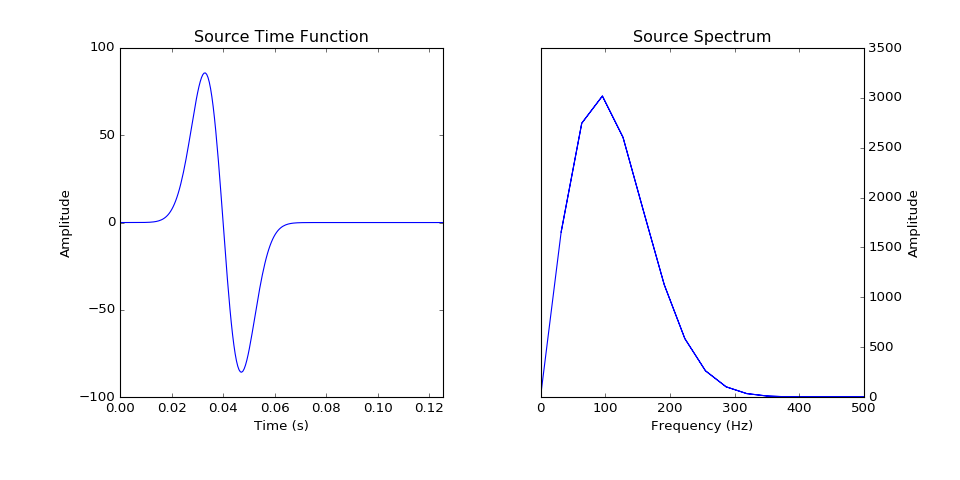

In [3]:
# Plot Source Time Function 
# -------------------------

f0   = 100. # dominant frequency of the source (Hz)
t0   = 4. / f0 # source time shift

print('Source frequency =', f0, 'Hz')

# Source time function (Gaussian)
# -------------------------------
src  = np.zeros(nt + 1)
time = np.linspace(0 * dt, nt * dt, nt)
# 1st derivative of a Gaussian
src  = -2. * (time - t0) * (f0 ** 2) * (np.exp(-1.0 * (f0 ** 2) * (time - t0) ** 2))

# Plot Source Time Function
# -------------------------
plt.ion()
fig1  = plt.figure(figsize=(12, 6))
gs1   = gridspec.GridSpec(1,2,width_ratios=[1,1],height_ratios=[1,0.1],hspace=0.3, wspace=0.3)

# Plot Source Time Function
# -------------------------
ax1  = plt.subplot(gs1[0])
ax1.plot(time, src) # plot source time function
ax1.set_title('Source Time Function')
ax1.set_xlim(time[0], time[-1])
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')

# Plot Source Spectrum
# --------------------
ax2  = plt.subplot(gs1[1])
spec = np.fft.fft(src) # amplitude of the source in frequency domain
freq = np.fft.fftfreq(spec.size, d = dt / 4.) # change time domain to frequency domain of the source
ax2.plot(np.abs(freq), np.abs(spec)) # plot frequency and spectrum of the source
ax2.set_xlim(0, 500) # only display frequency from 0 to 500 Hz
ax2.set_title('Source Spectrum')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Amplitude')

ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")

plt.show()

<IPython.core.display.Javascript object>


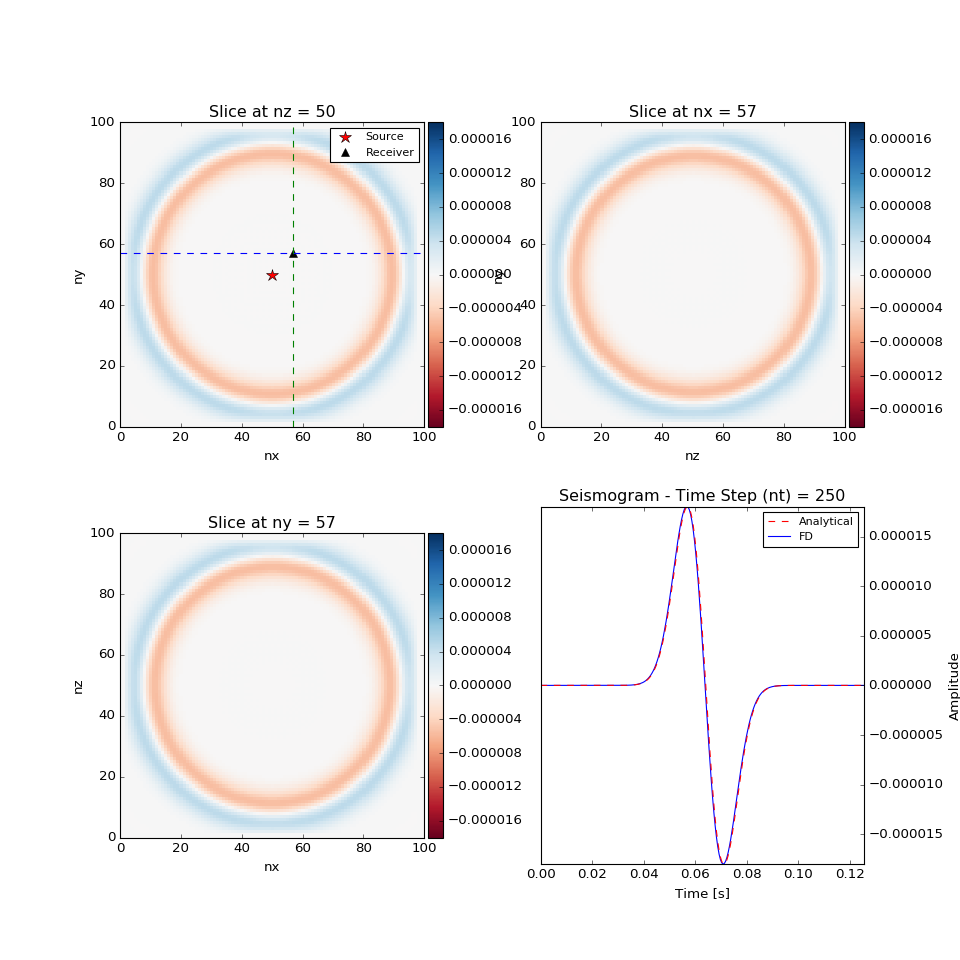

In [4]:
# Plot 2D Slices & Seismogram (PLEASE RERUN THIS CODE AGAIN AFTER SIMULATION!) 
# ---------------------------------------------------------------------------

# Initialize Empty Pressure
# -------------------------
p    = np.zeros((nx, ny, nz)) # p at time n (now)
pold = np.zeros((nx, ny, nz)) # p at time n-1 (past)
pnew = np.zeros((nx, ny, nz)) # p at time n+1 (present)
d2px = np.zeros((nx, ny, nz)) # 2nd space derivative of p in x-direction
d2py = np.zeros((nx, ny, nz)) # 2nd space derivative of p in y-direction
d2pz = np.zeros((nx, ny, nz)) # 2nd space derivative of p in z-direction

# Initialize Velocity Model (assume homogeneous model)
# ----------------------------------------------------
c    = np.zeros((nx, ny, nz))
c    = c + c0                 # initialize wave velocity in model

# Initialize Grid
# ---------------
x    = np.arange(nx)
x    = x * dx                 # coordinate in x-direction
y    = np.arange(ny)
y    = y * dy                 # coordinate in y-direction
z    = np.arange(nz)
z    = z * dz                 # coordinate in z-direction

# Initialize Empty Seismogram
# ---------------------------
seis = np.zeros(nt) 

# Analytical Solution 
# -------------------
G    = time * 0.0
r    = np.sqrt((x[isx] - x[irx]) ** 2 + (y[isy] - y[iry]) ** 2 + (z[isz] - z[irz]) ** 2)
t_ar = time[0] + r / c0
i_ar = int(t_ar / dt)
G[i_ar] = 1.0 / (4 * np.pi * c0 ** 2 * r) # Calculate Green's function
Gc   = np.convolve(G, src)
Gc   = Gc[0:nt]
lim  = Gc.max() # get limit value from maximum amplitude of analytical solution

# Plot Position Configuration
# ---------------------------
plt.ion()
fig2 = plt.figure(figsize=(12, 12))
gs2  = gridspec.GridSpec(2,2,width_ratios=[1,1],height_ratios=[1,1],hspace=0.15, wspace=0.3)

# Plot 3D Wave Propagation
# ------------------------
# Note: comma is needed to update the variable

# 2D Slice at nz
# --------------
ax3  = plt.subplot(gs2[0])
leg1,= ax3.plot(isx, isz, 'r*', markersize=11) # plot source location
leg2,= ax3.plot(irx, irz, 'k^', markersize=8) # plot receiver location
slc1,= plt.plot(np.array([0,nx]),np.array([irx,irx]), linewidth=1, linestyle='--') # plot 2D slice at nx
slc2,= plt.plot(np.array([irx,irx]),np.array([0,ny]), linewidth=1, linestyle='--') # plot 2D slice at ny
im3  = ax3.imshow(p[:,:,isx],vmin=-lim, vmax=+lim, interpolation='nearest', cmap=plt.cm.RdBu)
div3 = make_axes_locatable(ax3)
cax3 = div3.append_axes("right", size="5%", pad=0.05) # size & position of colorbar
fig2.colorbar(im3, cax=cax3) # plot colorbar
ax3.set_title('Slice at nz = %d' % isz)
ax3.set_xlim(0, nz)
ax3.set_ylim(0, nz)
ax3.set_xlabel('nx')
ax3.set_ylabel('ny')
ax3.legend((leg1, leg2), ('Source', 'Receiver'), loc='upper right', fontsize=10, numpoints=1)

# 2D Slice at nx
# --------------
ax4  = plt.subplot(gs2[1])
im4  = ax4.imshow(p[irx,:,:],vmin=-lim, vmax=+lim, interpolation="nearest", cmap=plt.cm.RdBu)
div4 = make_axes_locatable(ax4)
cax4 = div4.append_axes("right", size="5%", pad=0.05) # size & position of colorbar
fig2.colorbar(im4, cax=cax4) # plot colorbar
ax4.set_title('Slice at nx = %d' % irx)
ax4.set_xlim(0, nz)
ax4.set_ylim(0, ny)
ax4.set_xlabel('nz')
ax4.set_ylabel('ny')

# 2D Slice at ny
# --------------
ax5  = plt.subplot(gs2[2])
im5  = ax5.imshow(p[:,irx,:],vmin=-lim, vmax=+lim, interpolation="nearest", cmap=plt.cm.RdBu)
div5 = make_axes_locatable(ax5)
cax5 = div5.append_axes("right", size="5%", pad=0.05) # size & position of colorbar
fig2.colorbar(im5, cax=cax5) # plot colorbar
ax5.set_title('Slice at ny = %d' % iry)
ax5.set_xlim(0, nz)
ax5.set_ylim(0, ny)
ax5.set_xlabel('nx')
ax5.set_ylabel('nz')

# Plot Seismogram 
# ---------------
# Note: comma is needed to update the variable
ax6  = plt.subplot(gs2[3])
up61,= ax6.plot(time, seis) # update seismogram each time step
up62,= ax6.plot([0], [0], 'r|', markersize=15) # update time step position
ax6.set_ylim(-lim, lim)
ax6.set_xlim(time[0], time[-1])
ax6.set_title('Seismogram - Time Step (nt) = 0')
ax6.set_xlabel('Time [s]')
ax6.set_ylabel('Amplitude')
leg3,= ax6.plot(0,0,'r--',markersize=1)
leg4,= ax6.plot(0,0,'b-',markersize=1)
ax6.legend((leg3, leg4), ('Analytical', 'FD'), loc='upper right', fontsize=10, numpoints=1)

ax6.yaxis.tick_right()
ax6.yaxis.set_label_position("right")

plt.plot(time,Gc,'r--')
plt.show()

In [5]:
# 3D Wave Propagation (Finite Difference Solution) 
# ------------------------------------------------

# Point Operator (choose 3 or 5 point operator)
# ---------------------------------------------
op   = 5 
print(op, '- point operator')

# Calculate Partial Derivatives
# -----------------------------
for it in range(nt):
    if op == 3: # use 3 point operator FD scheme
        for i in range(1, nz - 1):
                d2pz[:, :, i] = (p[:, :, i + 1] - 2 * p[:, :, i] + p[:, :, i - 1]) / dz ** 2
        for j in range(1, ny - 1):
                d2py[:, j, :] = (p[:, j + 1, :] - 2 * p[:, j, :] + p[:, j - 1, :]) / dy ** 2
        for k in range(1, nx - 1):
                d2px[k, :, :] = (p[k + 1, :, :] - 2 * p[k, :, :] + p[k - 1, :, :]) / dx ** 2
    
    if op == 5: # use 5 point operator FD scheme
        for i in range(2, nz - 2):
                d2pz[:, :, i] = (-1./12 * p[:,:,i+2] + 4./3  * p[:,:,i+1] - 5./2 * p[:,:,i] \
                                + 4./3  * p[:,:,i-1] - 1./12 * p[:,:,i-2]) / dz ** 2
        for j in range(2, ny - 2):
                d2py[:, j, :] = (-1./12 * p[:,j+2,:] + 4./3  * p[:,j+1,:] - 5./2 * p[:,j,:] \
                                + 4./3  * p[:,j-1,:] - 1./12 * p[:,j-2,:]) / dy ** 2
        for k in range(2, nx - 2):
                d2px[k, :, :] = (-1./12 * p[k+2,:,:] + 4./3  * p[k+1,:,:] - 5./2 * p[k,:,:] \
                                + 4./3  * p[k-1,:,:] - 1./12 * p[k-2,:,:]) / dx ** 2

    # Time Extrapolation
    # ------------------
    pnew = 2 * p - pold + (c ** 2) * (dt ** 2) * (d2px + d2py + d2pz)
    
    # Add Source Term at isx, isy and isz
    # -----------------------------------
    pnew[isx, isy, isz] = pnew[isx, isy, isz] + src[it] / (dx * dy * dz) * (dt ** 2)
    
    # Remap Time Levels
    # -----------------
    pold, p = p, pnew
    
    # Output Seismogram
    # -----------------
    seis[it] = p[irx, iry, irz]
    
    # Update data for Wave Propagation Plot
    # -------------------------------------
    idisp = 5 # display frequency
    if (it % idisp) == 0:
        ax3.imshow(p[:, :, isx],vmin=-lim, vmax=+lim, interpolation="nearest", cmap=plt.cm.RdBu)
        ax4.imshow(p[irx, :, :],vmin=-lim, vmax=+lim, interpolation="nearest", cmap=plt.cm.RdBu)
        ax5.imshow(p[:, irx, :],vmin=-lim, vmax=+lim, interpolation="nearest", cmap=plt.cm.RdBu)
        ax6.set_title('Seismogram - Time Step (nt) = %d' % it)
        up61.set_ydata(seis)
        up62.set_data(time[it], seis[it])
        fig2.canvas.draw()

5 - point operator
